In [1]:
%run -i 'KRPC.ipynb'

In [2]:
conn = krpc.connect(name='laptop', address='192.168.1.9')

ksc = conn.space_center
vessel = ksc.active_vessel
obt = vessel.orbit
ap = vessel.auto_pilot
con = vessel.control

vrf = vessel.reference_frame
srfrf = vessel.surface_reference_frame
vobtrf = vessel.orbital_reference_frame
obtrf = obt.body.reference_frame
obtorf = obt.body.orbital_reference_frame
obtnrrf = obt.body.non_rotating_reference_frame

flight = lambda rf: vessel.flight(rf)

In [30]:
t = ksc.ut
o = KeplerOrbit(obt)

f = flight(obtorf)
print(obt.time_to_apoapsis, obt.time_to_periapsis)
print(f.longitude)
print(o.Ω * 180/π)
print(o.ν * 180/π)

93.74291767160798 1161.2628530771888
71.2948074774119
239.561698078797
13.3712006268


In [ ]:
speed = conn.add_stream(getattr, flight(srfrf), 'speed')
altitude = conn.add_stream(getattr, flight(obtrf), 'mean_altitude')
apoapsis = conn.add_stream(getattr, obt, 'apoapsis_altitude')

In [5]:
con.throttle = 0.6

ap.set_rotation(90, 90, roll=90)

time.sleep(1)

con.activate_next_stage()

while flight(obtrf).speed < 100.:
    time.sleep(0.1)
    
ap.set_rotation(80, 90, roll=90)

while flight(obtrf).mean_altitude < 5000.:
    time.sleep(0.1)

ap.disengage()
ap.sas = True
ap.sas_mode = ksc.SASMode.prograde

while obt.apoapsis_altitude < 80000:
    time.sleep(0.1)
    
ap.sas_mode = ksc.SASMode.stability_assist
ap.sas = False

while abs(obt.eccentricity) > 0.1:
    obt.apoapsis
    ap.set_direction(, 90, roll=90)
    

    
ap.disengage()
con.throttle = 0.

In [11]:
ksc.SASMode.prograde

<SASMode.prograde: 2>

In [62]:
speed.remove()
altitude.remove()
apoapsis.remove()

In [4]:
def prelaunch(conn):
    ksc = conn.space_center
    vessel = ksc.active_vessel
    obtbody_rf = vessel.orbit.body.reference_frame
    
    flight = vessel.flight
    ap = vessel.auto_pilot
    cont = vessel.control
    
    vessel
    


ut = conn.add_stream(getattr, ksc, 'ut')
mean_altitude = conn.add_stream(getattr, flight(), 'mean_altitude')
#position = conn.add_stream(vessel.position, obtbody_rf)

timestamp = []
altitude = []

t0 = ut()
alt = mean_altitude()
while alt < 80000:
    t1 = ut()
    alt = mean_altitude()
    if abs(t1 - t0) > 0.001:
        timestamp.append(t1)
        altitude.append(alt)
        t0 = t1
        time.sleep(1./25.)


In [7]:
print(ut())

36067852.33412806


TypeError: float() argument must be a string or a number, not 'Stream'

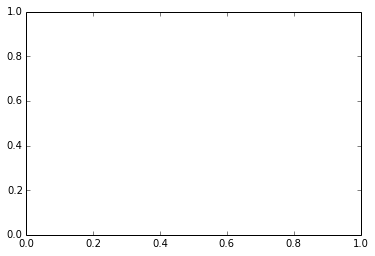

In [5]:
pyplot.plot(timestamp,altitude)

In [42]:

print(vessel.name)
print(vessel.met)
print(vessel.mass)
print(vessel.position(vessel.orbit.body.reference_frame))

Kerbal X
0.0
129220.0
(159785.88961593373, -1018.0912642640197, -578429.1905414417)


In [81]:
def latlon(vessel):
    x,y,z = vessel.position(vessel.orbit.body.reference_frame)
    r = np.sqrt(x*x + y*y + z*z)
    lat = 90. - np.arccos(y / r) * 180. / np.pi
    lon = np.arctan2(z, x) * 180. / np.pi
    return lat,lon

(-0.097205327823132848, -74.557662208705707)


In [82]:
data = []


(-0.0972053225905114, -74.557662190809467)


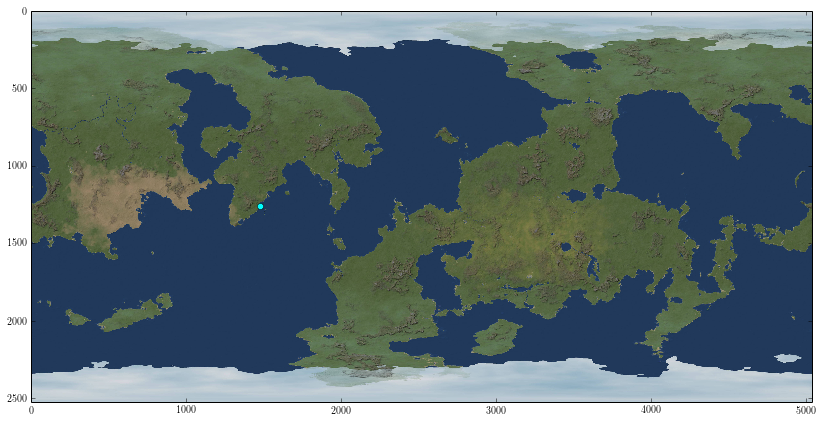

In [91]:
image = pyplot.imread('/home/goetz/kerbin.jpg')
fig, ax = pyplot.subplots(figsize=(15,7))
im = ax.imshow(image)
ax.set_autoscale_on(False)

xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()

lat,lon = latlon(vessel)
xmap = ((lon + 180.) / 360.) * (xmax - xmin) + xmin
ymap = ((lat + 90.) / 180.) * (ymax - ymin) + ymin

pt = ax.plot(xmap,ymap, marker='o', color='cyan')